##### Imported the necessary modules to scrape comments from Reddit

In [1]:
import praw

In [2]:
import time

In [3]:
import pandas as pd

In [4]:
import datetime as datetime

In [55]:
import matplotlib.pyplot as plt

In [69]:
import matplotlib.dates as mdates

##### Established a Reddit API connection with the provided client credentials and user agent

In [5]:
reddit = praw.Reddit(client_id = 'brisBrtKDgJ1XfIswt31-w', 
                     client_secret = 'MBWrOPI48hVkeFHSMvfVSjCqvnMy4Q', 
                     user_agent = 'MyMediaEffectsResearch')

##### Defined the subreddits to be incorporated in the study

In [6]:
subreddits = ['worldnews', 'news', 'futurology', 'technology', 'politics',
              'hacking', 'politicaldiscussion', 'privacy']

##### Defined the search terms to be used in the study

Discarded search terms due to too many irrelevant posts: 'tiktok national security,' 'tiktok data privacy,' 'tiktok user data,' 'tiktok security risk,' 'tiktok restrict access,' 'tiktok government device.'

##### Retrieved the most popular Reddit posts about TikTok

In [8]:
results = []
seen_posts = set()

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    
    for term in search_terms:
        search_results = subreddit.search(term, limit = None, sort = 'top')
        for submission in search_results:
            url_id = submission.id
            if url_id not in seen_posts:
                post_info = {
                    'Title': submission.title,
                    'Upvotes': submission.score,
                    'Comments': submission.num_comments,
                    'Date': datetime.datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d'),
                    'Subreddit': submission.subreddit.display_name,
                    'URL ID': url_id,
                    'Search term': term
                }
                results.append(post_info)
                seen_posts.add(url_id)

most_popular_posts = pd.DataFrame(results)
most_popular_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,The United States is 'looking at' banning TikT...,79746,5908,2020-07-07,worldnews,hmo4jy,tiktok ban
1,TikTok Bans Conversion Therapy and White Supre...,71518,3046,2020-10-22,worldnews,jfvlxn,tiktok ban
2,India bans 59 Chinese apps including TikTok as...,68987,2435,2020-06-29,worldnews,hi1mr0,tiktok ban
3,NATO bans TikTok on devices | CNN Business,9332,325,2023-04-01,worldnews,128iecx,tiktok ban
4,China says US overstretching concept of nation...,4952,692,2023-02-28,worldnews,11e06kn,tiktok ban
...,...,...,...,...,...,...,...
1074,Does it really matter if Chinese companies col...,0,77,2023-08-17,privacy,15tc92g,tiktok data flow
1075,Just a quick reminder that TikTok is Spyware a...,6761,456,2021-11-07,privacy,qojbxx,tiktok spyware
1076,Is TikTok spyware?,345,179,2022-06-08,privacy,v83iw4,tiktok spyware
1077,Which device offers the best privacy/convenien...,20,58,2022-11-30,privacy,z8qxhe,tiktok spyware


##### Checked the number of posts fetched using each search term

In [9]:
most_popular_posts['Search term'].value_counts()

Search term
tiktok ban          470
tiktok data flow    321
tiktok china        145
tiktok bytedance     68
tiktok block         38
tiktok ceo           33
tiktok spyware        4
Name: count, dtype: int64

##### Fetched the most commented Reddit posts about TikTok per year

In [10]:
year2020 = pd.DataFrame(most_popular_posts)
year2020['Date'] = pd.to_datetime(most_popular_posts['Date'])

year2020_filtered = year2020[(year2020['Date'] >= '2020-02-24') & (year2020['Date'] <= '2020-12-31')]
year2020_popular_posts = year2020_filtered.groupby(year2020_filtered['Date'].dt.to_period("M")) \
                        .apply(lambda x: x[x['Comments'] == x['Comments'].max()])

year2020_popular_posts.reset_index(drop = True, inplace = True)
year2020_popular_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Reddit CEO: TikTok is ‘fundamentally parasitic’,41096,2959,2020-02-27,technology,fablco,tiktok ceo
1,"Aral Balkan: ""Anonymised data” is a multi-bill...",636,51,2020-03-30,privacy,frwrb4,tiktok data flow
2,China’s TikTok — Said to be Banning Cantonese ...,379,70,2020-04-02,worldnews,ftcpf4,tiktok ban
3,Dutch watchdog to investigate TikTok's use of ...,1177,52,2020-05-09,worldnews,ggo4at,tiktok data flow
4,India bans 59 Chinese apps including TikTok as...,68987,2435,2020-06-29,worldnews,hi1mr0,tiktok ban
5,The United States is 'looking at' banning TikT...,79746,5908,2020-07-07,worldnews,hmo4jy,tiktok ban
6,Trump says he will ban TikTok from operating i...,63395,7883,2020-08-01,technology,i1kqsw,tiktok ban
7,TikTok to be banned from US app stores from. S...,49507,4848,2020-09-18,technology,iv4fob,tiktok ban
8,TikTok Bans Conversion Therapy and White Supre...,71518,3046,2020-10-22,worldnews,jfvlxn,tiktok ban
9,Megathread: Joe Biden Projected to Defeat Pres...,214322,81655,2020-11-07,politics,jptq5n,tiktok block


In [11]:
year2021 = pd.DataFrame(most_popular_posts)
year2021['Date'] = pd.to_datetime(most_popular_posts['Date'])

year2021_filtered = year2021[(year2021['Date'] >= '2021-01-01') & (year2021['Date'] <= '2021-12-31')]
year2021_popular_posts = year2021_filtered.groupby(year2021_filtered['Date'].dt.to_period("M")) \
                        .apply(lambda x: x[x['Comments'] == x['Comments'].max()])

year2021_popular_posts.reset_index(drop = True, inplace = True)
year2021_popular_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Italy orders TikTok to block underage users af...,59552,3224,2021-01-22,worldnews,l2ydqd,tiktok block
1,TikTok agrees to block underage users in Italy,852,92,2021-02-05,worldnews,ld50ck,tiktok block
2,To what extent are the Biden administration's ...,77,191,2021-03-24,PoliticalDiscussion,mce4lv,tiktok data flow
3,TikTok sued for billions over use of children'...,57410,1994,2021-04-21,worldnews,mvd5kn,tiktok data flow
4,Bill to ban TikTok on U.S. government devices ...,15225,364,2021-05-12,technology,nav7ge,tiktok ban
5,TikTok just gave itself permission to collect ...,44462,2926,2021-06-04,Futurology,nrxhw2,tiktok data flow
6,TikTok blocked creators from using 'Black Live...,26445,1534,2021-07-08,technology,ogfxlv,tiktok block
7,TikTok bans the 'milk crate challenge' because...,8316,957,2021-08-27,news,pcp1yp,tiktok ban
8,"Tick, tick, tick … TikTok China just limited k...",871,175,2021-09-20,technology,prmyto,tiktok china
9,Museum Starts OnlyFans Account After Its TikTo...,67419,1048,2021-10-20,technology,qbyglh,tiktok ban


In [12]:
year2022 = pd.DataFrame(most_popular_posts)
year2022['Date'] = pd.to_datetime(most_popular_posts['Date'])

year2022_filtered = year2022[(year2022['Date'] >= '2022-01-01') & (year2022['Date'] <= '2022-12-31')]
year2022_popular_posts = year2022_filtered.groupby(year2022_filtered['Date'].dt.to_period("M")) \
                        .apply(lambda x: x[x['Comments'] == x['Comments'].max()])

year2022_popular_posts.reset_index(drop = True, inplace = True)
year2022_popular_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,China hires western TikTokers to polish its im...,6989,614,2022-01-22,technology,sa6ta1,tiktok china
1,TikTok shares your data more than any other so...,23807,1435,2022-02-08,technology,snqkvn,tiktok data flow
2,"Meta, YouTube, and TikTok block Russian state ...",12601,333,2022-03-01,technology,t468ud,tiktok block
3,Taliban Ban TikTok App for ‘Misleading' Youth ...,2534,406,2022-04-21,technology,u8kb4j,tiktok ban
4,I’m Joanna Stern. I interviewed Elon Musk live...,49,111,2022-05-02,technology,ugrubp,tiktok ceo
5,FCC Commissioner urges Google and Apple to ban...,35941,3222,2022-06-29,technology,vnd558,tiktok ban
6,Nearly half of Gen Z is using TikTok and Insta...,11514,2088,2022-07-13,technology,vy8sx4,tiktok data flow
7,TikTok's in-app browser has code that could be...,3705,166,2022-08-19,technology,wsne1p,tiktok data flow
8,TikTok won't commit to stopping US data flows ...,17311,1203,2022-09-15,technology,xehqj1,tiktok china
9,Operating Loss At TikTok Parent ByteDance Topp...,824,110,2022-10-10,technology,y0be3f,tiktok bytedance


In [13]:
year2023 = pd.DataFrame(most_popular_posts)
year2023['Date'] = pd.to_datetime(most_popular_posts['Date'])

year2023_filtered = year2023[(year2023['Date'] >= '2023-01-01') & (year2021['Date'] <= '2023-10-31')]
year2023_popular_posts = year2023_filtered.groupby(year2023_filtered['Date'].dt.to_period("M")) \
                        .apply(lambda x: x[x['Comments'] == x['Comments'].max()])

year2023_popular_posts.reset_index(drop = True, inplace = True)
year2023_popular_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Nationwide ban on TikTok inches closer to reality,16262,1614,2023-01-29,technology,10o8sx5,tiktok ban
1,China says US overstretching concept of nation...,4952,692,2023-02-28,worldnews,11e06kn,tiktok ban
2,There's a 90% chance TikTok will be banned in ...,49104,5530,2023-03-27,technology,123nfrx,tiktok ban
3,TikTok fined £12.7m for misusing children's data,29377,755,2023-04-04,news,12bfq15,tiktok data flow
4,An explosive new lawsuit claims TikTok's owner...,28602,2494,2023-05-12,technology,13g0o0s,tiktok data flow
5,"American TikTok user data stored in China, vid...",29712,2778,2023-06-25,technology,14ih1ec,tiktok china
6,TikTok executive admits Australian users’ data...,2731,181,2023-07-11,news,14wrheu,tiktok china
7,Close to half of American adults favor TikTok ...,7494,1025,2023-08-17,technology,15tp2ul,tiktok ban
8,TikTok Is Spending $1.3 Billion to Dodge Bans ...,2396,100,2023-09-11,technology,16fpt6s,tiktok ban
9,Europe gives TikTok CEO 24 hours to respond ab...,17408,1409,2023-10-13,technology,176y1g0,tiktok ceo


##### Searched for replacements 

#### March 2020

New pick: frdt88 (see index 3)

In [14]:
mar_2020_posts = (year2020_filtered[year2020_filtered['Date'].dt.to_period("M") == '2020-03']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
mar_2020_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,"Aral Balkan: ""Anonymised data” is a multi-bill...",636,51,2020-03-30,privacy,frwrb4,tiktok data flow
1,No TikTok on Government Devices Act would ban ...,104,9,2020-03-29,politics,frdt88,tiktok ban
2,New Senate Bill Doesn't Want Federal Employees...,4,5,2020-03-12,politics,fhk7bj,tiktok ban
3,TikTok will stop using China-based moderators ...,37,4,2020-03-16,technology,fjdj4i,tiktok china
4,Senate bill seeks to ban Chinese app TikTok fr...,7,3,2020-03-12,technology,fhjypm,tiktok ban
5,Anyway to spoof SIM regional information?,2,2,2020-03-12,privacy,fhehuv,tiktok block
6,Analysis of Microsoft IE Edge Script Engine Vu...,7,1,2020-03-17,hacking,fjykpe,tiktok data flow
7,Popular app TikTok agrees to $5.7 million FTC ...,1,0,2020-03-01,worldnews,fbql92,tiktok data flow


#### April 2020 

New pick: fur1zj (see index 6)

In [15]:
apr_2020_posts = (year2020_filtered[year2020_filtered['Date'].dt.to_period("M") == '2020-04']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
apr_2020_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,China’s TikTok — Said to be Banning Cantonese ...,379,70,2020-04-02,worldnews,ftcpf4,tiktok ban
1,China orders TikTok owner ByteDance to remove ...,224,34,2020-04-24,technology,g77xs9,tiktok ban
2,"We're Geoffrey Fowler and Drew Harwell, tech w...",13,19,2020-04-22,technology,g64qxw,tiktok data flow
3,Liberals Trying to Censor Coronavirus Data Flo...,0,13,2020-04-10,politics,fyop38,tiktok data flow
4,How can I get personal information about a Tik...,0,8,2020-04-25,privacy,g7uh86,tiktok ban
5,Automating manual data entry and the future of...,13,7,2020-04-30,Futurology,gauh3h,tiktok data flow
6,TikTok Privacy Concerns,0,7,2020-04-04,privacy,fur1zj,tiktok data flow
7,China Orders TikTok Owner ByteDance to Remove ...,24,2,2020-04-25,worldnews,g7n7s9,tiktok bytedance
8,Possible to use a serial (UART) Terminal on a ...,6,1,2020-04-12,hacking,g05g2h,tiktok data flow
9,China reportedly orders TikTok owner ByteDance...,5,0,2020-04-28,worldnews,g9psag,tiktok bytedance


#### October 2020 

New pick: j3ywv3 (see index 4)

In [16]:
oct_2020_posts = (year2020_filtered[year2020_filtered['Date'].dt.to_period("M") == '2020-10']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
oct_2020_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,TikTok Bans Conversion Therapy and White Supre...,71518,3046,2020-10-22,worldnews,jfvlxn,tiktok ban
1,"TikTok Tightens Crackdown On QAnon, Will Ban A...",737,156,2020-10-18,technology,jdr3he,tiktok ban
2,Oracle CEO donated $250K to Graham Super PAC d...,3428,55,2020-10-17,politics,jcyo95,tiktok ceo
3,"TikTok Tightens Crackdown On QAnon, Will Ban A...",901,37,2020-10-19,politics,jdvrzy,tiktok ban
4,Americans Want Facebook and TikTok Banned Over...,351,36,2020-10-02,privacy,j3ywv3,tiktok ban
5,Pakistan blocks social media app TikTok for 'i...,86,29,2020-10-09,worldnews,j80bb9,tiktok block
6,A federal judge just blocked President Trump's...,1070,17,2020-10-30,politics,jl697l,tiktok ban
7,TikTok rival Triller announces ban on QAnon co...,328,9,2020-10-14,politics,jaw10o,tiktok ban
8,Pakistan reverses TikTok ban after only 10 days,19,6,2020-10-19,worldnews,je845p,tiktok ban
9,Pakistan bans TikTok over 'immoral' content,11,4,2020-10-09,technology,j7zxs9,tiktok ban


#### November 2020 

New pick: js0bce (see index 1)

In [17]:
nov_2020_posts = (year2020_filtered[year2020_filtered['Date'].dt.to_period("M") == '2020-11']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
nov_2020_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Megathread: Joe Biden Projected to Defeat Pres...,214322,81655,2020-11-07,politics,jptq5n,tiktok block
1,TikTok says the Trump administration has forgo...,15999,504,2020-11-11,politics,js0bce,tiktok ban
2,"TikTok censored content critical of China, sen...",2231,112,2020-11-07,worldnews,jpjlcs,tiktok china
3,TikTok says it’s been waiting weeks for a Trum...,898,84,2020-11-11,privacy,jsd6al,tiktok ban
4,Trump Seems to Have Forgotten About His TikTok...,119,20,2020-11-12,politics,jt59sa,tiktok ban
5,TikTok failed to ban flagged 'child predator',188,12,2020-11-02,technology,jmxk5d,tiktok ban
6,TikTok says it’s been waiting weeks for a Trum...,47,6,2020-11-11,politics,jsd2cg,tiktok ban
7,Trump admin puts a hold on TikTok ban it seems...,67,5,2020-11-12,politics,jt5zke,tiktok ban
8,Indian developers are racing to replace TikTok...,7,3,2020-11-27,technology,k204ry,tiktok ban
9,ByteDance gets 15-day extension on U.S. order ...,16,3,2020-11-15,politics,jujlfb,tiktok bytedance


#### January 2021

New pick: kwm3ay (see index 1)

In [18]:
jan_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-01']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
jan_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Italy orders TikTok to block underage users af...,59552,3224,2021-01-22,worldnews,l2ydqd,tiktok block
1,TikTok banned Trump before Trump could ban TikTok,28800,389,2021-01-13,politics,kwm3ay,tiktok ban
2,The nightmare of a cashless society (rant),228,69,2021-01-14,privacy,kx37qv,tiktok data flow
3,Italian watchdog tells TikTok to block users w...,328,25,2021-01-23,technology,l3m2n8,tiktok block
4,Donald Trump's bitter fight to ban TikTok in t...,87,11,2021-01-13,politics,kwmrrf,tiktok ban
5,Italy tells TikTok to block users after death ...,21,11,2021-01-22,worldnews,l2wp3s,tiktok block
6,Biden admin vows to hold China 'accountable' w...,69,8,2021-01-25,politics,l4zqh9,tiktok china
7,Italy tells TikTok to block users after death ...,10,8,2021-01-22,technology,l2x5xk,tiktok block
8,If access a data collection app (Tiktok for ex...,2,5,2021-01-10,privacy,kuftuc,tiktok data flow
9,TikTok Sister App Douyin Fined for Spreading S...,19,4,2021-01-12,worldnews,kvnbra,tiktok china


#### February 2021

New pick: luolhm (see index 1)

In [19]:
feb_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-02']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
feb_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,TikTok agrees to block underage users in Italy,852,92,2021-02-05,worldnews,ld50ck,tiktok block
1,"Oracle, Which Promised To Protect TikTok User ...",174,32,2021-02-28,technology,luolhm,tiktok china
2,EU-US data flows could face 'massive disruptio...,149,21,2021-02-25,worldnews,lruayu,tiktok data flow
3,TikTok To Pay $92 Million To Settle Class-Acti...,182,17,2021-02-26,news,lsm6mg,tiktok data flow
4,Biden backs off on TikTok ban in review of Tru...,60,7,2021-02-10,news,lh76lr,tiktok ban
5,TikTok agrees to block users in Italy who say ...,30,5,2021-02-03,technology,lbp8ed,tiktok block
6,TikTok agrees to pay $92 million to settle dat...,7,4,2021-02-26,technology,lsz9qt,tiktok data flow
7,Biden backs off on TikTok ban in review of Tru...,45,4,2021-02-11,politics,lh9htp,tiktok ban
8,TikTok owner ByteDance to pay $92M in US priva...,5,0,2021-02-26,technology,lslhu4,tiktok bytedance


#### March 2021

New pick: mazp2y (see index 1)

In [20]:
mar_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-03']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
mar_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,To what extent are the Biden administration's ...,77,191,2021-03-24,PoliticalDiscussion,mce4lv,tiktok data flow
1,TikTok no more threatening than Facebook to da...,15,28,2021-03-22,technology,mazp2y,tiktok data flow
2,Guide to Stack Buffer Overflow (OSCP),33,3,2021-03-29,hacking,mfmw7c,tiktok data flow
3,Pakistani court orders TikTok banned over ‘obs...,13,1,2021-03-11,news,m2wyj4,tiktok ban


#### July 2021

New pick: opda3f (see index 2)

In [21]:
jul_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-07']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
jul_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,TikTok blocked creators from using 'Black Live...,26445,1534,2021-07-08,technology,ogfxlv,tiktok block
1,Are we driving ourselves crazy fighting agains...,8,35,2021-07-03,privacy,od6zxi,tiktok data flow
2,Dutch data protection authority fines TikTok o...,301,14,2021-07-22,worldnews,opda3f,tiktok data flow
3,(Full Article) about OpenAI plan to reach huma...,22,14,2021-07-09,Futurology,oh7koz,tiktok data flow
4,TikTok parent company ByteDance ends 6-day wor...,13,2,2021-07-13,technology,ojc7jf,tiktok bytedance
5,TikTok parent ByteDance has begun selling the ...,7,0,2021-07-04,technology,odmwys,tiktok bytedance


#### August 2021

New pick: p74bh8 (see index 4)

In [22]:
aug_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-08']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
aug_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,TikTok bans the 'milk crate challenge' because...,8316,957,2021-08-27,news,pcp1yp,tiktok ban
1,The latest 2021 data and studies show that the...,454,38,2021-08-15,worldnews,p4lqx6,tiktok data flow
2,Rubio wants Biden to block TikTok after Chines...,14,38,2021-08-19,politics,p74bh8,tiktok block
3,Senators Demand TikTok Reveal How It Plans To ...,97,8,2021-08-18,politics,p6zxa3,tiktok data flow
4,TikTok owner ByteDance is reportedly aiming fo...,3,3,2021-08-10,technology,p1l2as,tiktok bytedance
5,Senators Demand TikTok Reveal How It Plans To ...,25,2,2021-08-18,technology,p6o8sz,tiktok data flow
6,TikTok owner ByteDance takes first step into v...,6,0,2021-08-30,technology,pemfq5,tiktok bytedance
7,The data must flow! Facebook and Google fundin...,8,0,2021-08-17,technology,p5zarj,tiktok data flow


#### September 2021

New pick: po6o4n (see index 1)

In [23]:
sep_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-09']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
sep_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,"Tick, tick, tick … TikTok China just limited k...",871,175,2021-09-20,technology,prmyto,tiktok china
1,Ireland launches two inquiries into TikTok con...,1005,36,2021-09-14,privacy,po6o4n,tiktok china
2,TikTok investigated over alleged transfer of p...,195,29,2021-09-15,technology,poqqjl,tiktok china
3,The Morning After: China’s tech crackdown reac...,15,3,2021-09-21,technology,psjwrk,tiktok china
4,Microsoft CEO Satya Nadella calls failed TikTo...,32,1,2021-09-28,technology,px9j63,tiktok ceo
5,TikTok faces EU regulator’s data privacy probes,1,0,2021-09-15,technology,ponxoo,tiktok data flow


#### October 2021

New pick: qgg6of (see index 2)

In [24]:
oct_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-10']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
oct_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Museum Starts OnlyFans Account After Its TikTo...,67419,1048,2021-10-20,technology,qbyglh,tiktok ban
1,"Will the ""Protecting Kids Online"" hearings res...",5,28,2021-10-26,PoliticalDiscussion,qgivz0,tiktok data flow
2,TikTok Tells U.S. Lawmakers It Does Not Give I...,9,13,2021-10-26,technology,qgg6of,tiktok china
3,TikTok parent ByteDance sets up Bellevue WA of...,13,3,2021-10-12,technology,q6rf6p,tiktok bytedance


#### December 2021

New pick: rm3mcz (see index 1)

In [25]:
dec_2021_posts = (year2021_filtered[year2021_filtered['Date'].dt.to_period("M") == '2021-12']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
dec_2021_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,"Americans widely distrust Facebook, TikTok and...",27394,1051,2021-12-22,technology,rm3mcz,tiktok data flow


#### January 2022

New pick: rtx8wi (see index 2)

In [26]:
jan_2022_posts = (year2022_filtered[year2022_filtered['Date'].dt.to_period("M") == '2022-01']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
jan_2022_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,China hires western TikTokers to polish its im...,6989,614,2022-01-22,technology,sa6ta1,tiktok china
1,"Instead of blocking data, send confusing data.",700,130,2022-01-02,privacy,rtx8wi,tiktok data flow
2,What's the Most App Trackers You Have Seen?,217,92,2022-01-11,privacy,s1dy7i,tiktok block
3,Just installed Win 10 on a new machine (no cho...,65,27,2022-01-03,privacy,rv13d3,tiktok data flow
4,"I made Fugu, a product analytics tool that doe...",181,19,2022-01-29,privacy,sfjces,tiktok data flow
5,Do tech companies know if you're using a fake ...,1,10,2022-01-26,privacy,sctfq1,tiktok data flow


#### March 2022

New pick: tbdh1a (see index 5)

In [27]:
mar_2022_posts = (year2022_filtered[year2022_filtered['Date'].dt.to_period("M") == '2022-03']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
mar_2022_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,"Meta, YouTube, and TikTok block Russian state ...",12601,333,2022-03-01,technology,t468ud,tiktok block
1,Lets use Lemmy instead of Reddit! Centralizati...,545,162,2022-03-18,privacy,thikeo,tiktok ban
2,"Meta, YouTube, and TikTok block Russian state ...",7924,131,2022-03-01,worldnews,t46900,tiktok block
3,Facebook and TikTok block Russian state media ...,4555,63,2022-03-01,worldnews,t3uy1k,tiktok block
4,"TikTok Is Moving American User Data To The US,...",648,34,2022-03-11,technology,tbdh1a,tiktok china
5,Why aren’t we seeing more steps taken to activ...,50,29,2022-03-04,privacy,t6meh3,tiktok data flow
6,TikTok users in Russia can see only old Russia...,136,23,2022-03-10,worldnews,taw79z,tiktok ban
7,US and EU aim to revive transatlantic data flo...,31,3,2022-03-25,politics,tnmdn7,tiktok data flow
8,US and EU aim to revive transatlantic data flo...,18,1,2022-03-25,technology,tnm25q,tiktok data flow
9,TikTok Parent 'ByteDance' Partners with Qualco...,7,0,2022-03-04,technology,t6jy0j,tiktok bytedance


#### May 2022

New pick: uiz4ob (see index 2)

In [28]:
may_2022_posts = (year2022_filtered[year2022_filtered['Date'].dt.to_period("M") == '2022-05']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
may_2022_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,I’m Joanna Stern. I interviewed Elon Musk live...,49,111,2022-05-02,technology,ugrubp,tiktok ceo
1,"Meta, TikTok and YouTube may finally have to s...",1039,21,2022-05-05,technology,uiz4ob,tiktok data flow


#### July 2022

New pick: vs56zu (see index 2)

In [29]:
jul_2022_posts = (year2022_filtered[year2022_filtered['Date'].dt.to_period("M") == '2022-07']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
jul_2022_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Nearly half of Gen Z is using TikTok and Insta...,11514,2088,2022-07-13,technology,vy8sx4,tiktok data flow
1,TikTok admits China-based employees can access...,14062,846,2022-07-05,technology,vs56zu,tiktok china
2,TikTok confirms that China-based employees can...,7031,490,2022-07-02,worldnews,vprn7w,tiktok china
3,TikTok confirms that China-based employees can...,3809,307,2022-07-01,technology,vp63e4,tiktok china
4,TikTok Confirms US User Data Can Be Accessed i...,2168,202,2022-07-01,privacy,vp6by9,tiktok china
5,"Overrun by influencers, historic sites are ban...",3401,169,2022-07-18,technology,w1xfpw,tiktok ban
6,TikTok tells U.S. lawmakers it’s working to st...,354,70,2022-07-04,news,vr21o0,tiktok data flow
7,TikTok admits Australian data can be accessed ...,467,67,2022-07-13,news,vxr4mp,tiktok china
8,TikTok Confirms Some China-Based Employees Can...,385,45,2022-07-02,technology,vpf8oc,tiktok china
9,What are the top info collecting Chinese and R...,17,35,2022-07-04,privacy,vrihf6,tiktok block


#### October 2022

New pick: y98fce (see index 1)

In [30]:
oct_2022_posts = (year2022_filtered[year2022_filtered['Date'].dt.to_period("M") == '2022-10']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
oct_2022_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Operating Loss At TikTok Parent ByteDance Topp...,824,110,2022-10-10,technology,y0be3f,tiktok bytedance
1,TikTok Parent ByteDance Planned To Use TikTok ...,495,78,2022-10-20,worldnews,y98fce,tiktok bytedance
2,Are websites aware when thier pages contain th...,17,14,2022-10-25,privacy,ycrrtu,tiktok data flow
3,TikTok Parent ByteDance Planned To Use TikTok ...,20,7,2022-10-21,privacy,y9ll0y,tiktok bytedance
4,TikTok Deal Likely to Leave US Data Leaking to...,46,6,2022-10-19,technology,y8fy8c,tiktok china
5,A China-Based ByteDance Team Investigated TikT...,31,5,2022-10-25,technology,yd9gom,tiktok bytedance
6,President Biden signs executive order aimed at...,3,1,2022-10-07,technology,xyb4ph,tiktok data flow
7,Open Source privacy scanning tool to create da...,49,0,2022-10-13,privacy,y2xmj2,tiktok data flow


#### October 2023

New pick: 17b9d3y (see index 1)

In [31]:
oct_2023_posts = (year2023_filtered[year2023_filtered['Date'].dt.to_period("M") == '2023-10']
                  .sort_values(by = 'Comments', ascending = False).reset_index(drop = True))
oct_2023_posts

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Europe gives TikTok CEO 24 hours to respond ab...,17408,1409,2023-10-13,technology,176y1g0,tiktok ceo
1,TikTok execs insist China can't access user da...,68,25,2023-10-19,technology,17b9d3y,tiktok china
2,Montana federal judge voices doubt over state’...,39,5,2023-10-12,politics,176b91p,tiktok ban
3,US senators examine TikTok hiring of ByteDance...,42,5,2023-10-04,politics,16zvjs8,tiktok bytedance
4,Montana Struggles to Convince Judge to Back It...,45,4,2023-10-14,technology,177jgj9,tiktok ban
5,Utah accuses TikTok of misleading users about ...,50,4,2023-10-11,politics,1756ovm,tiktok china


##### Defined which posts will be included in the sampling frame by indicating the respective URL IDs

In [32]:
url_ids_2020 = ['fablco', 'frdt88', 'fur1zj', 'ggo4at', 'hi1mr0', 'hmo4jy',
                'i1kqsw', 'iv4fob', 'j3ywv3', 'js0bce', 'k97nfp' ]

In [33]:
url_ids_2021 = ['kwm3ay', 'luolhm', 'mazp2y', 'mvd5kn', 'nav7ge', 'nrxhw2', 
                'opda3f', 'p74bh8', 'po6o4n', 'qgg6of', 'qojbxx', 'rm3mcz']

In [34]:
url_ids_2022 = ['rtx8wi', 'snqkvn', 'tbdh1a', 'u8kb4j', 'uiz4ob', 'vnd558',
                'vs56zu', 'wsne1p', 'xehqj1', 'y98fce', 'yw88rf', 'zl1b92']

In [35]:
url_ids_2023 = ['10o8sx5', '11e06kn', '123nfrx', '12bfq15', '13g0o0s',
                '14ih1ec', '14wrheu', '15tp2ul', '16fpt6s', '17b9d3y' ]

##### Created a new dataset for the posts that will be included in the sampling frame per year

In [36]:
most_popular_posts['Date'] = pd.to_datetime(most_popular_posts['Date'])
updated_popular_posts_2020 = most_popular_posts[most_popular_posts['URL ID'].isin(url_ids_2020)]

updated_popular_posts_2020 = updated_popular_posts_2020.sort_values(by = 'Date')
updated_popular_posts_2020.reset_index(drop = True, inplace = True)

updated_popular_posts_2020

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Reddit CEO: TikTok is ‘fundamentally parasitic’,41096,2959,2020-02-27,technology,fablco,tiktok ceo
1,No TikTok on Government Devices Act would ban ...,104,9,2020-03-29,politics,frdt88,tiktok ban
2,TikTok Privacy Concerns,0,7,2020-04-04,privacy,fur1zj,tiktok data flow
3,Dutch watchdog to investigate TikTok's use of ...,1177,52,2020-05-09,worldnews,ggo4at,tiktok data flow
4,India bans 59 Chinese apps including TikTok as...,68987,2435,2020-06-29,worldnews,hi1mr0,tiktok ban
5,The United States is 'looking at' banning TikT...,79746,5908,2020-07-07,worldnews,hmo4jy,tiktok ban
6,Trump says he will ban TikTok from operating i...,63395,7883,2020-08-01,technology,i1kqsw,tiktok ban
7,TikTok to be banned from US app stores from. S...,49507,4848,2020-09-18,technology,iv4fob,tiktok ban
8,Americans Want Facebook and TikTok Banned Over...,351,36,2020-10-02,privacy,j3ywv3,tiktok ban
9,TikTok says the Trump administration has forgo...,15999,504,2020-11-11,politics,js0bce,tiktok ban


In [37]:
most_popular_posts['Date'] = pd.to_datetime(most_popular_posts['Date'])
updated_popular_posts_2021 = most_popular_posts[most_popular_posts['URL ID'].isin(url_ids_2021)]

updated_popular_posts_2021 = updated_popular_posts_2021.sort_values(by = 'Date')
updated_popular_posts_2021.reset_index(drop = True, inplace = True)

updated_popular_posts_2021

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,TikTok banned Trump before Trump could ban TikTok,28800,389,2021-01-13,politics,kwm3ay,tiktok ban
1,"Oracle, Which Promised To Protect TikTok User ...",174,32,2021-02-28,technology,luolhm,tiktok china
2,TikTok no more threatening than Facebook to da...,15,28,2021-03-22,technology,mazp2y,tiktok data flow
3,TikTok sued for billions over use of children'...,57410,1994,2021-04-21,worldnews,mvd5kn,tiktok data flow
4,Bill to ban TikTok on U.S. government devices ...,15225,364,2021-05-12,technology,nav7ge,tiktok ban
5,TikTok just gave itself permission to collect ...,44462,2926,2021-06-04,Futurology,nrxhw2,tiktok data flow
6,Dutch data protection authority fines TikTok o...,301,14,2021-07-22,worldnews,opda3f,tiktok data flow
7,Rubio wants Biden to block TikTok after Chines...,14,38,2021-08-19,politics,p74bh8,tiktok block
8,Ireland launches two inquiries into TikTok con...,1005,36,2021-09-14,privacy,po6o4n,tiktok china
9,TikTok Tells U.S. Lawmakers It Does Not Give I...,9,13,2021-10-26,technology,qgg6of,tiktok china


In [38]:
most_popular_posts['Date'] = pd.to_datetime(most_popular_posts['Date'])
updated_popular_posts_2022 = most_popular_posts[most_popular_posts['URL ID'].isin(url_ids_2022)]

updated_popular_posts_2022 = updated_popular_posts_2022.sort_values(by = 'Date')
updated_popular_posts_2022.reset_index(drop = True, inplace = True)

updated_popular_posts_2022

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,"Instead of blocking data, send confusing data.",700,130,2022-01-02,privacy,rtx8wi,tiktok data flow
1,TikTok shares your data more than any other so...,23807,1435,2022-02-08,technology,snqkvn,tiktok data flow
2,"TikTok Is Moving American User Data To The US,...",648,34,2022-03-11,technology,tbdh1a,tiktok china
3,Taliban Ban TikTok App for ‘Misleading' Youth ...,2534,406,2022-04-21,technology,u8kb4j,tiktok ban
4,"Meta, TikTok and YouTube may finally have to s...",1039,21,2022-05-05,technology,uiz4ob,tiktok data flow
5,FCC Commissioner urges Google and Apple to ban...,35941,3222,2022-06-29,technology,vnd558,tiktok ban
6,TikTok admits China-based employees can access...,14062,846,2022-07-05,technology,vs56zu,tiktok china
7,TikTok's in-app browser has code that could be...,3705,166,2022-08-19,technology,wsne1p,tiktok data flow
8,TikTok won't commit to stopping US data flows ...,17311,1203,2022-09-15,technology,xehqj1,tiktok china
9,TikTok Parent ByteDance Planned To Use TikTok ...,495,78,2022-10-20,worldnews,y98fce,tiktok bytedance


In [39]:
most_popular_posts['Date'] = pd.to_datetime(most_popular_posts['Date'])
updated_popular_posts_2023 = most_popular_posts[most_popular_posts['URL ID'].isin(url_ids_2023)]

updated_popular_posts_2023 = updated_popular_posts_2023.sort_values(by = 'Date')
updated_popular_posts_2023.reset_index(drop = True, inplace = True)

updated_popular_posts_2023

,Title,Upvotes,Comments,Date,Subreddit,URL ID,Search term
0,Nationwide ban on TikTok inches closer to reality,16262,1614,2023-01-29,technology,10o8sx5,tiktok ban
1,China says US overstretching concept of nation...,4952,692,2023-02-28,worldnews,11e06kn,tiktok ban
2,There's a 90% chance TikTok will be banned in ...,49104,5530,2023-03-27,technology,123nfrx,tiktok ban
3,TikTok fined £12.7m for misusing children's data,29377,755,2023-04-04,news,12bfq15,tiktok data flow
4,An explosive new lawsuit claims TikTok's owner...,28602,2494,2023-05-12,technology,13g0o0s,tiktok data flow
5,"American TikTok user data stored in China, vid...",29712,2778,2023-06-25,technology,14ih1ec,tiktok china
6,TikTok executive admits Australian users’ data...,2731,181,2023-07-11,news,14wrheu,tiktok china
7,Close to half of American adults favor TikTok ...,7494,1025,2023-08-17,technology,15tp2ul,tiktok ban
8,TikTok Is Spending $1.3 Billion to Dodge Bans ...,2396,100,2023-09-11,technology,16fpt6s,tiktok ban
9,TikTok execs insist China can't access user da...,68,25,2023-10-19,technology,17b9d3y,tiktok china


##### Checked the number of comments in all posts included in the sampling frame

In [40]:
comments_sum_2020 = updated_popular_posts_2020['Comments'].sum()
comments_sum_2020

24737

In [41]:
comments_sum_2021 = updated_popular_posts_2021['Comments'].sum()
comments_sum_2021

7341

In [42]:
comments_sum_2022 = updated_popular_posts_2022['Comments'].sum()
comments_sum_2022

18859

In [43]:
comments_sum_2023 = updated_popular_posts_2023['Comments'].sum()
comments_sum_2023

15194

In [44]:
total_comments_sum = comments_sum_2020 + comments_sum_2021 + comments_sum_2022 + comments_sum_2023
total_comments_sum

66131

##### Extracted the comments from all posts included in the sampling frame

In [45]:
all_comments_2020 = []

for url_id in updated_popular_posts_2020['URL ID']:
    try:
        submission_2020 = reddit.submission(id = url_id)
        submission_2020.comments.replace_more(limit = None)
        for comment in submission_2020.comments.list():
            comment_data_2020 = {
                'URL ID': url_id,
                'Comment': comment.body,
                'Date': datetime.datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m')
            }
            all_comments_2020.append(comment_data_2020)
        time.sleep(1)
    except Exception as e:
        print(f"An error occurred for submission ID {url_id}: {e}")
        time.sleep(60)
        
comments_2020 = pd.DataFrame(all_comments_2020)
comments_2020

,URL ID,Comment,Date
0,fablco,"Here's why he used the word ""parasitic"":\n\n> ...",2020-02
1,fablco,ELI5 anyone?,2020-02
2,fablco,"Tiktok CEO: I know you are, but what am I?",2020-02
3,fablco,Coming from a company that is constantly tryin...,2020-02
4,fablco,"Adolescence, puberty, peer pressure, all that ...",2020-02
...,...,...,...
24143,k97nfp,You aren't worth my time.,2020-12
24144,k97nfp,"Go on then, which racist sub do I post in?",2020-12
24145,k97nfp,[deleted],2020-12
24146,k97nfp,"I’m just saying, don’t download the app.",2020-12


In [46]:
all_comments_2021 = []

for url_id in updated_popular_posts_2021['URL ID']:
    try:
        submission_2021 = reddit.submission(id = url_id)
        submission_2021.comments.replace_more(limit = None)
        for comment in submission_2021.comments.list():
            comment_data_2021 = {
                'URL ID': url_id,
                'Comment': comment.body,
                'Date': datetime.datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m')
            }
            all_comments_2021.append(comment_data_2021)
        time.sleep(1)
    except Exception as e:
        print(f"An error occurred for submission ID {url_id}: {e}")
        time.sleep(60)
        
comments_2021 = pd.DataFrame(all_comments_2021)
comments_2021

,URL ID,Comment,Date
0,kwm3ay,"\nAs a reminder, this subreddit [is for civil ...",2021-01
1,kwm3ay,Trump might have to use farmersonly.com now.,2021-01
2,kwm3ay,I thought he was a 3D chess master....,2021-01
3,kwm3ay,He could always just *update his fucking websi...,2021-01
4,kwm3ay,Classic Uno,2021-01
...,...,...,...
6964,rm3mcz,It’s all good. They definitely obfuscate delet...,2021-12
6965,rm3mcz,Yeah...I deleted my account. Then recreated ...,2021-12
6966,rm3mcz,[deleted],2021-12
6967,rm3mcz,"Welp, I was just trying make you see another p...",2021-12


In [51]:
all_comments_2022 = []

for url_id in updated_popular_posts_2022['URL ID']:
    try:
        submission_2022 = reddit.submission(id = url_id)
        submission_2022.comments.replace_more(limit = None)
        for comment in submission_2022.comments.list():
            comment_data_2022 = {
                'URL ID': url_id,
                'Comment': comment.body,
                'Date': datetime.datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m')
            }
            all_comments_2022.append(comment_data_2022)
        time.sleep(1)
    except Exception as e:
        print(f"An error occurred for submission ID {url_id}: {e}")
        time.sleep(60)
        
comments_2022 = pd.DataFrame(all_comments_2022)
comments_2022

,URL ID,Comment,Date
0,rtx8wi,[deleted],2022-01
1,rtx8wi,There is an extension for the Firefox browser ...,2022-01
2,rtx8wi,"Im using custom rom miui.eu on my poco x3 pro,...",2022-01
3,rtx8wi,WhatCampaign browser extension does/did someth...,2022-01
4,rtx8wi,There is an xposed module called xprivacylua w...,2022-01
...,...,...,...
17877,zl1b92,"> It's untrue it/they (social media apps) ""doe...",2022-12
17878,zl1b92,What evidence do you have to support the claim...,2022-12
17879,zl1b92,My argument was that talking to teens about th...,2022-12
17880,zl1b92,> What evidence do you have to support the cla...,2022-12


In [48]:
all_comments_2023 = []

for url_id in updated_popular_posts_2023['URL ID']:
    try:
        submission_2023 = reddit.submission(id = url_id)
        submission_2023.comments.replace_more(limit = None)
        for comment in submission_2023.comments.list():
            comment_data_2023 = {
                'URL ID': url_id,
                'Comment': comment.body,
                'Date': datetime.datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m')
            }
            all_comments_2023.append(comment_data_2023)
        time.sleep(1)
    except Exception as e:
        print(f"An error occurred for submission ID {url_id}: {e}")
        time.sleep(60)
        
comments_2023 = pd.DataFrame(all_comments_2023)
comments_2023

,URL ID,Comment,Date
0,10o8sx5,I haven't been following the TikTok drama in t...,2023-01
1,10o8sx5,I wish this was more of a conversation on data...,2023-01
2,10o8sx5,Maybe instead of banning tik tok they should p...,2023-01
3,10o8sx5,Can we get a comprehensive privacy act instead...,2023-01
4,10o8sx5,>inches closer\n\nstill super far away. Hell i...,2023-01
...,...,...,...
13951,17b9d3y,"Ofc they dont, they have spies not tied to the...",2023-10
13952,17b9d3y,Found the CCP bot,2023-10
13953,17b9d3y,Christ Reddit is such an echo chamber. Is anyo...,2023-10
13954,17b9d3y,Wtf does the comment even have to do with any ...,2023-10


##### Merged all four datasets together

In [52]:
merged_dataset = pd.concat([comments_2020, comments_2021, comments_2022, comments_2023], ignore_index = True)
merged_dataset

,URL ID,Comment,Date
0,fablco,"Here's why he used the word ""parasitic"":\n\n> ...",2020-02
1,fablco,ELI5 anyone?,2020-02
2,fablco,"Tiktok CEO: I know you are, but what am I?",2020-02
3,fablco,Coming from a company that is constantly tryin...,2020-02
4,fablco,"Adolescence, puberty, peer pressure, all that ...",2020-02
...,...,...,...
62950,17b9d3y,"Ofc they dont, they have spies not tied to the...",2023-10
62951,17b9d3y,Found the CCP bot,2023-10
62952,17b9d3y,Christ Reddit is such an echo chamber. Is anyo...,2023-10
62953,17b9d3y,Wtf does the comment even have to do with any ...,2023-10


##### Saved the merged dataset as a CSV file

In [54]:
merged_dataset.to_csv('sample dataset.csv', index = False)

##### Data visualization

Line graph of comments per year.

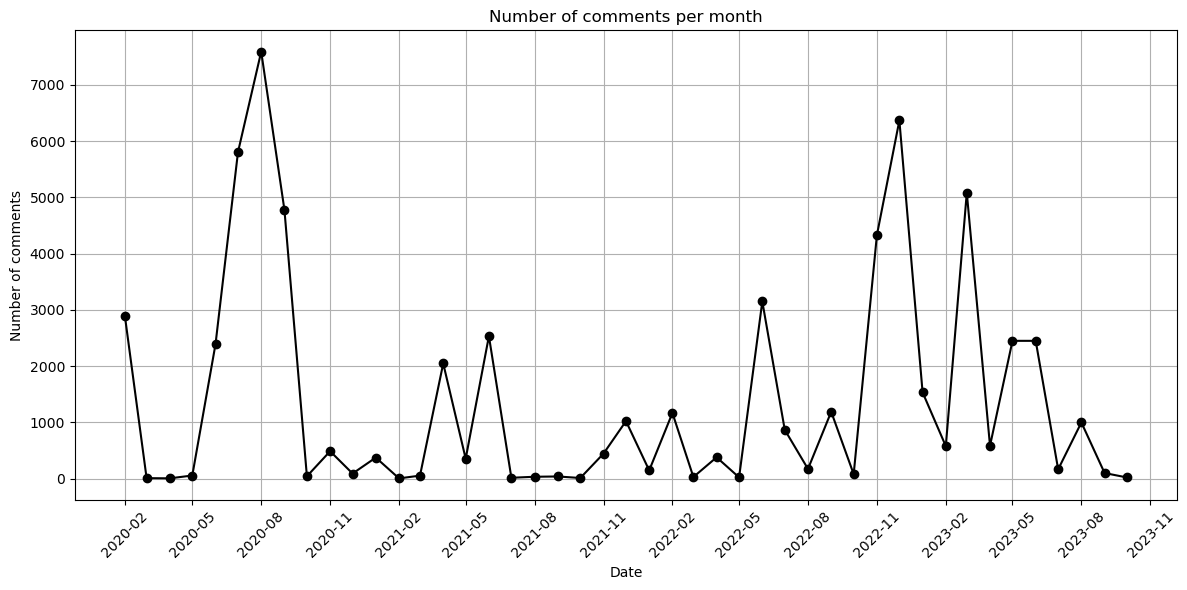

In [73]:
merged_dataset['Date'] = pd.to_datetime(merged_dataset['Date'], format = '%Y-%m')

comment_counts = merged_dataset.groupby('Date').size()

plt.figure(figsize = (12, 6))
plt.plot(comment_counts.index, comment_counts.values, marker = 'o', linestyle = '-', color = 'black')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Number of comments per month')
plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()